In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


fc=280   #kg/cm2
fy=4200  #kg/cm2
b=35.56  #cm (Base)
h=55  #cm (Altura)
nc=2  #numero de capas de acero
rec=6.35 #cm (recubrimiento)
dv=2.8575 #cm (diametro de varilla longitudinal)

E=2040000  #kg/cm2
Eu=0.003  #Deformacion unitaria ultima del concreto
Ey=fy/E #Deformación unitaria de fluencia del acero

if fc<=280:
    beta1=0.85
elif fc>280 and fc<562.4:
    beta1=0.85-(0.05*(fc-280)/(70.307))
else:
    beta1=0.65


di=np.zeros(np.int0(nc))
Ast=np.zeros(np.int0(nc))
ti=np.zeros(np.int0(nc))

for dd in range(nc):
    nv = float(input('Ingrese numero de varillas por capa: '))
    Asi = nv*(dv**2)*(np.pi/4)  #Area de acero por capa de acero
    espcapa = (h-(rec*2)-(nc*dv))/(nc-1)

    if dd == 1: #Calculo el d para cada capa de acero
        di[dd] = (rec+(dv/2))  #cm
    elif dd == nc:
        di[dd] = (h-(rec+(dv/2)))  #cm
    else:
        di[dd] = (di[dd-1]+espcapa)  #cm

    Ast[dd] = Asi   #cm2


#Obtención de valores Pn y Mn
P0=((beta1*fc*((h*b)-np.sum(Ast))) + (fy*np.sum(Ast))) /1000 #tons
Pnmax=0.85*0.65*P0
M0=0
e0=M0/P0

cb = (Eu/(Eu+Ey))*di[-1]    #cm
ab = 0.85*cb    #cm
fprims = Eu*fy*((cb-di[0])/cb)  #kg/cm2
Pb = ((0.85*fc*ab*b)+(fprims*Ast[0])-(fy*Ast[-1])) /1000  #Ton (Carga Balanceada)
Mb = ((0.85*fc*ab*b*((h/2)-(ab/2)))+(fprims*Ast[0]*((h/2)-di[0]))-(fprims*Ast[-1]*(di[-1]-(h/2)))) /100000 #Ton*m (Momento Balanceado)
eb = (Mb/Pb) #cm (excentricidad)

print(f'cb es: {cb} cm')
print(f'Pb es: {Pb} Tons')
print(f'Mb es: {Mb} Tons*m')
print(f'eb es: {eb} m')


cb es: 4.61297965116279 cm
Pb es: -76.79405246160391 Tons
Mb es: 8.236955637292477 Tons*m
eb es: -0.10726033297189068 m



Calculo de valores de Pn & Mn


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16400\3774477238.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  Es=Eu*((C[i]-di[u])/C[i])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16400\3774477238.py:34: RuntimeWarning: invalid value encountered in double_scalars
  fs=fy*((np.abs(fs))/fs)


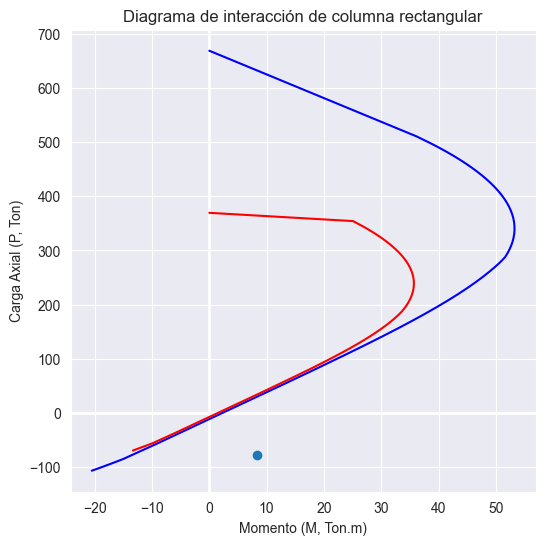

Programa finalizado

Valores de Pn son: 


,0
0,NaN
1,-106.650081
2,-99.456293
3,-92.262505
4,-85.068717
...,...
994,510.590806
995,510.590806
996,510.590806
997,510.590806


Valores de Mn son: 


,0
0,NaN
1,-20.503716
2,-18.617145
3,-16.791721
4,-15.027445
...,...
994,36.152943
995,36.152943
996,36.152943
997,36.152943


Valores de phi son: 


,0
0,0.650000
1,0.650000
2,0.650000
3,0.650000
4,0.650000
...,...
994,0.693705
995,0.693705
996,0.693705
997,0.693705


In [2]:
#...........................
print('\nCalculo de valores de Pn & Mn')

iteraciones=1000
C=np.zeros(np.int0(iteraciones))
Esi=np.zeros(np.int0(nc))
fsi=np.zeros(np.int0(nc))
Mnst=np.zeros(np.int0(nc))
Mnsti=np.zeros(np.int0(iteraciones))
Fsi=np.zeros(np.int0(iteraciones))
ygac=np.zeros(np.int0(iteraciones))
Pn=np.zeros(np.int0(iteraciones))
Mn=np.zeros(np.int0(iteraciones))
Mnphi=np.zeros(np.int0(iteraciones))
Pnphi=np.zeros(np.int0(iteraciones))
phi=np.zeros(np.int0(iteraciones))


for i in range(1,iteraciones):
    C[i]=i-1
    if i>=h+1:
        C[i]=h+1
    else:
        C[i]=i-1

    a=beta1*C[i]

    for u in range(1,nc):

        Es=Eu*((C[i]-di[u])/C[i])
        Esi[u]=Es
        fs=E*Es
        if np.abs(fs)>fy:
            fs=fy*((np.abs(fs))/fs)
        else:
            fs=E*Es

        if di[u]>a:
            fsi[u]=(fs-(0.85*fc))*Ast[u]
        else:
            fsi[u]=fs*Ast[u]

        yg=h/2
        Mnst[u]=(fsi[u]*(yg-di[u]))



    if Esi[u]<Ey:
        phi[i]=0.65
    elif Esi[u]>Ey and Esi[u]<=(Eu+Ey):
        phi[i]=0.65+(0.25*((Esi[u]-Ey)/Eu))
    elif Esi[u]>=(Eu+Ey):
        phi[i]=0.9


    Mnsti[i]=np.sum(Mnst)
    Fsi[i]=np.sum(fsi)


    Pn[i] = (beta1*fc*(a*b)+Fsi[i])/ 1000  #Ton
    Pnphi[i] = phi[i]*Pn[i]   #Ton
    Mn[i] = ((0.5*beta1*fc*(a*b)*(h-a))+Mnsti[i])/ 100000  #Ton*m
    Mnphi[i] = phi[i]*Mn[i]   #Ton*m

Pn=pd.DataFrame(np.delete(Pn,0))
Pnphi=pd.DataFrame(np.delete(Pnphi,0))
Mn=pd.DataFrame(np.delete(Mn,0))
Mnphi=pd.DataFrame(np.delete(Mnphi,0))
phi=pd.DataFrame(np.delete(phi,0))

Pn1=np.append(Pn,[P0])
Mn1=np.append(Mn,[M0])

Pnphi1=np.append(Pnphi,[Pnmax])
Mnphi1=np.append(Mnphi,[0.8*0.65*M0])


#FIN obtencion de valores Pn y Mn

# #Importacion de datos dde excel
# tbmommax=pd.read_excel(r'C:\Users\USUARIO\Documents\Nico\hormigon II\Momentomax1.xlsx', sheet_name='Hoja1')
# tbmommin=pd.read_excel(r'C:\Users\USUARIO\Documents\Nico\hormigon II\momentomin.xlsx', sheet_name='Hoja1')
# print('Momentos maximos de la columna: ',tbmommax)
# print('Momentos minimos de la columna: ',tbmommin)
# tbmx=pd.DataFrame(tbmommin)
# tbmm=pd.DataFrame(tbmommax)
# momax=tbmx.to_numpy()
# momin=tbmm.to_numpy()
# #FIN importacion


#Graficador
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(6, 6))
ax.axvline(x=0, color='white', linewidth=2)
ax.axhline(y=0, color='white', linewidth=2)


ax.plot(Mn1, Pn1, '-', color='blue')
ax.plot(Mnphi1, Pnphi1, '-', color='red')
ax.plot(Mb, Pb, '-o')
#ax.scatter(momax[:,0], momax[:,1])
#ax.scatter(momin[:,0], momin[:,1])

ax.set_xlabel('Momento (M, Ton.m)')
ax.set_ylabel('Carga Axial (P, Ton)')

plt.title('Diagrama de interacción de columna rectangular')
plt.show()
print('Programa finalizado')
#Fin graficador
#Fin programa

'''
Importante considerar que unicamente aplica para columnas rectangulares
cuyo eje neutro sea paralelo a la base. Caso contrario debe modificarse el loop 
tomando un numero de iteraciones correspondiente a la longitud de la base.
'''

print('\nValores de Pn son: ')
display(Pn)
# print('Valores de Pnphi son: ')
# display(Pnphi)
print('Valores de Mn son: ')
display(Mn)

print('Valores de phi son: ')
display(phi)
# print('Valores de Mnphi son: ')
# display(Mnphi)